# Boston Housing

# Data 

* X_train (404, 13)
* Y_train (404,)

* X_test (102, 13)
* Y_test (102,)


The dataset contains 13 different features:

1. Per capita crime rate.
2. The proportion of residential land zoned for lots over 25,000 square feet.
3. The proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. The average number of rooms per dwelling.
7. The proportion of owner-occupied units built before 1940.
8. Weighted distances to five Boston employment centers.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. Percentage lower status of the population.


In [2]:
import tensorflow as tf
from sklearn.datasets import load_boston
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt

C:\Users\abido\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


### Loading the data

In [3]:
total_features, total_prices = load_boston(True)

### Preprocessing

In [4]:
# Keep 300 samples for training
train_features = scale(total_features[:300])
train_prices = total_prices[:300]

# Keep 100 samples for validation
valid_features = scale(total_features[300:400])
valid_prices = total_prices[300:400]

# Keep remaining samples as test set
test_features = scale(total_features[400:])
test_prices = total_prices[400:]

### Model

In [5]:
w = tf.Variable(initial_value= tf.truncated_normal([13,1], mean = 0.0, stddev = 1.0, dtype=tf.float64))
b = tf.Variable(tf.zeros(1, dtype = tf.float64))

In [6]:
def calc(x,y):
    predictions = tf.add(b, tf.matmul(x, w))
    loss = tf.reduce_mean(tf.square(y - predictions))
    return [predictions, loss]

In [7]:
y, cost = calc(train_features, train_prices)

In [8]:
# Model parameters
learning_rate = 0.025
epochs = 500
points = [[], []]

673.6728578989918
78.91465098791015
78.75951110375239
78.73452106842076
78.72799299640722


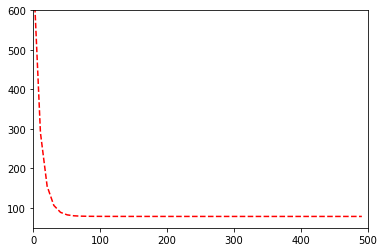

Validation error = 104.34543175972148 

Test error = 123.33899102895566 



In [9]:
init = tf.global_variables_initializer()
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

with tf.Session() as sess:

    sess.run(init)

    for i in range(epochs):

        sess.run(optimizer)

        if i % 10 == 0.:
            points[0].append(i+1)
            points[1].append(sess.run(cost))

        if i % 100 == 0:
            print(sess.run(cost))

    plt.plot(points[0], points[1], 'r--')
    plt.axis([0, epochs, 50, 600])
    plt.show()

    valid_cost = calc(valid_features, valid_prices)[1]

    print('Validation error =', sess.run(valid_cost), '\n')

    test_cost = calc(test_features, test_prices)[1]

    print('Test error =', sess.run(test_cost), '\n')